<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Lections/L05_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы машинного обучения

## Лекция 5

### Гиперпараметры и валидация.

#  Гиперпараметры и кросс-валидация

Текст для ознакомления - <a href='https://arxiv.org/pdf/1811.12808.pdf'>Крайне рекомендуется к прочтению!</a>

Мануалы sklearn по  <a href='https://scikit-learn.org/stable/modules/cross_validation.html'>кросс-валидации</a> тоже рекомендуются.

## Гиперпараметры

Есть параметры, а есть гиперпараметры.

<b>Параметры</b> - т.н. "веса" модели, т.е. то, что подбирается во время обучения. <br>

Например, у нас есть N признаков и мы строим на них линейную регрессию

$$y = w_0 + w_1 x_1 + w_2x_2 +~...~+ w_n x_n$$

В этом случае параметры, это веса $w_i$

В случае SVM параметрами будут веса $c_i$ объектов из тренировочной выборки



<b>Гиперпараметры</b> - те характеристики модели, которые фиксируются до обучения, влияют на процесс обучения, и не меняются сами во время обучения.

Например, мы уже знакомы с гиперпараметром <b>k в алгоритме kNN</b> и гиперпараметром <b>C</b>  SVM.

<img src="https://miro.medium.com/max/800/1*2zYNhLc522h0zftD1zDh2g.png" width="300">


### Отбор признаков

*С некоторой точки зрения, набор используемых признаков тоже можно считать гиперпараметром.*

Создадим таблицу 200 на 10000 со "здоровыми" и "больными" пациентами и данными об наличии-отсутствии определенных SNP

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
snp_count = 10000
genes = [f"Gene{ind}" for ind in range(snp_count)]
healthy = pd.DataFrame(np.random.binomial(1,
                                          0.5,
                                          size=(100, snp_count) ),
                       columns=genes)
healthy['State'] = "H"
diseased = pd.DataFrame(np.random.binomial(1,
                                          0.5,
                                          size=(100, snp_count)) ,
                        columns=genes)
diseased['State'] = "D"
patients = pd.concat([healthy, diseased], axis=0)

In [ ]:
patients

,Gene0,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,...,Gene9991,Gene9992,Gene9993,Gene9994,Gene9995,Gene9996,Gene9997,Gene9998,Gene9999,State
0,1,1,1,0,0,0,1,1,0,1,...,0,1,0,0,1,1,1,1,1,H
1,1,1,1,0,0,1,0,1,0,1,...,1,0,1,1,0,1,0,0,0,H
2,1,0,0,0,1,0,0,0,0,1,...,1,1,0,1,1,1,0,1,0,H
3,1,0,0,1,1,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,H
4,1,0,0,1,1,1,1,1,1,1,...,0,1,1,0,0,1,0,0,1,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,0,0,0,1,0,0,1,...,0,1,1,1,0,0,0,0,1,D
96,0,0,1,1,0,1,1,1,0,0,...,1,0,1,1,0,0,0,1,1,D
97,0,0,1,0,1,1,1,0,0,0,...,1,1,0,1,0,0,1,1,0,D
98,1,0,0,1,1,1,0,1,1,1,...,1,0,1,0,1,0,0,1,0,D


In [ ]:
from scipy.stats import pearsonr

In [ ]:
patients

,Gene0,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,...,Gene9991,Gene9992,Gene9993,Gene9994,Gene9995,Gene9996,Gene9997,Gene9998,Gene9999,State
0,1,1,1,0,0,0,1,1,0,1,...,0,1,0,0,1,1,1,1,1,H
1,1,1,1,0,0,1,0,1,0,1,...,1,0,1,1,0,1,0,0,0,H
2,1,0,0,0,1,0,0,0,0,1,...,1,1,0,1,1,1,0,1,0,H
3,1,0,0,1,1,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,H
4,1,0,0,1,1,1,1,1,1,1,...,0,1,1,0,0,1,0,0,1,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,0,0,0,1,0,0,1,...,0,1,1,1,0,0,0,0,1,D
96,0,0,1,1,0,1,1,1,0,0,...,1,0,1,1,0,0,0,1,1,D
97,0,0,1,0,1,1,1,0,0,0,...,1,1,0,1,0,0,1,1,0,D
98,1,0,0,1,1,1,0,1,1,1,...,1,0,1,0,1,0,0,1,0,D


In [ ]:
qual = {}
for gene in genes:
    corr = (pearsonr(patients[gene], patients['State'] == "H"))[0]
    qual[gene] = abs(corr)

In [ ]:
qual

{'Gene0': 0.020064308847628186,
 'Gene1': 0.08000000000000002,
 'Gene2': 0.030256759043326507,
 'Gene3': 0.09102991273635128,
 'Gene4': 0.07003152127845946,
 'Gene5': 0.030556616567607033,
 'Gene6': 0.06001200360120044,
 'Gene7': 0.07028523397077112,
 'Gene8': 0.07000350026252188,
 'Gene9': 0.020016019225635902,
 'Gene10': 0.050062617432175896,
 'Gene11': 0.04007219498504306,
 'Gene12': 0.030013509119339782,
 'Gene13': 0.06001200360120039,
 'Gene14': 0.010004503039779908,
 'Gene15': 0.05006261743217591,
 'Gene16': 0.010040747710110171,
 'Gene17': 0.06019292654288457,
 'Gene18': 0.10050378152592124,
 'Gene19': 0.11004953343757914,
 'Gene20': 0.020016019225635867,
 'Gene21': 0.040032038451271776,
 'Gene22': 0.07028523397077116,
 'Gene23': 0.030443128277399163,
 'Gene24': 0.05000250018751562,
 'Gene25': 0.07042738243021138,
 'Gene26': 0.16028877994017218,
 'Gene27': 0.08006407690254362,
 'Gene28': 0.04000800240080028,
 'Gene29': 0.0601082924775646,
 'Gene30': 0.06001200360120042,
 'Gene31

In [ ]:
top_genes = sorted(qual, key=lambda x: -qual[x])[0:10]

In [ ]:
top_genes

['Gene233',
 'Gene3979',
 'Gene9308',
 'Gene4191',
 'Gene1963',
 'Gene9680',
 'Gene895',
 'Gene7508',
 'Gene8664',
 'Gene2023']

In [ ]:
for g in top_genes:
    print(qual[g])

0.2700135010125845
0.2503130871608795
0.2503130871608794
0.24077170617153837
0.23196848599883657
0.23196848599883652
0.23093719733253376
0.23093719733253373
0.23056557935493777
0.23056557935493777


In [ ]:
data_selected = patients[top_genes]

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(data_selected,
                                                    patients['State'])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
(y_pred == Y_test).mean()

0.78

Данные были РАНДОМНЫЕ. А получился отличный результат

In [ ]:
snp_count = 10000
genes = [f"Gene{ind}" for ind in range(snp_count)]
healthy_2 = pd.DataFrame(np.random.binomial(1,
                                          0.5,
                                          size=(100, snp_count) ),
                       columns=genes)
healthy_2['State'] = "H"
diseased_2 = pd.DataFrame(np.random.binomial(1,
                                          0.5,
                                          size=(100, snp_count)) ,
                        columns=genes)
diseased_2['State'] = "D"
patients_2 = pd.concat([healthy_2, diseased_2], axis=0)

In [ ]:
y_pred = model.predict(patients_2[top_genes])

In [ ]:
(y_pred == patients_2['State']).mean()

0.5

## Напоминание из статистики

Задача статистики - на основании выборки из генеральной совокупности оценить параметры генеральной совокупности (**inference**)

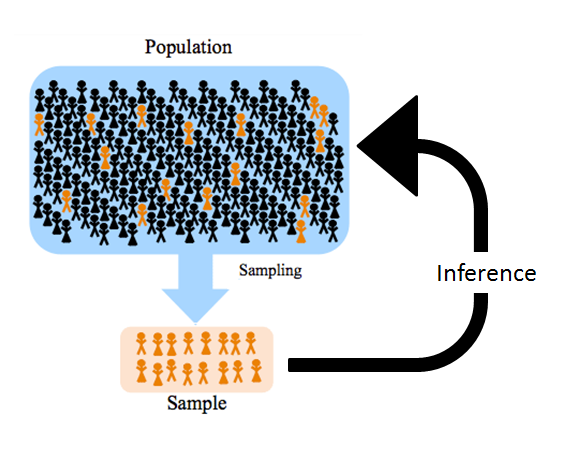

Задача машинного обучения - на основании выборки из генеральной совокупности научиться предсказывать некую характеристику/набор характеристик для любого объекта из генеральной совокупности

## Разбиение данных

Помните, как примерно выглядит пайплайн в машинном обучении?

1. Предобработать данные
2. Обучить модель
3. **Оценить ее качество на генеральной совокупности** - как?
4. Повторить шаги 2-3 пока не получим модель с хорошим качеством
5. **Финально оценить качество полученной модели на генеральной совокупности** - как?

<b>Во время процесса получения оптимальной модели встаёт множество вопросов:</b>

* Какие значения гиперпараметров оптимальные?
* Какой набор признаков позволяет достичь наибольшего качества?
* Как корректно сравнивать разные обученные модели между собой?
* Как, в конце концов, оценить обобщающую способность модели?

Для получения корректных ответов на все эти вопросы сначала необходимо построить правильную схему разбиения данных.

### Все - train

> With four parameters I can fit an elephant, and with five I can make him wiggle his trunk!

[Источник](https://fermatslibrary.com/s/drawing-an-elephant-with-four-complex-parameters)


Будем учить модель и тестировать на них же


In [ ]:
X = [0, 1, 2, -2, -3, 5, -6]
Y = [0, 1, 4, 4, 9, 25, 36]

Возьмем модель - **словарь**

In [ ]:
dt = {}
for x, y in zip(X, Y):
    dt[x] = y
dt

{0: 0, 1: 1, 2: 4, -2: 4, -3: 9, 5: 25, -6: 36}

Какое качество на обучающей выборке?

In [ ]:
err = 0
for x, y in zip(X, Y):
    y_pred = dt[x]
    err += (y - y_pred) ** 2
print(err)

0


Идеальное, а как с генерализацией?

In [ ]:
dt[3]

KeyError: 3

Грустно

### Train-test split


То, что не забывают делать (почти) все.

Разделим данные на обучающую выборку и тестовую.

Учим модель на обучающей выборке, тестируем - на тестовой


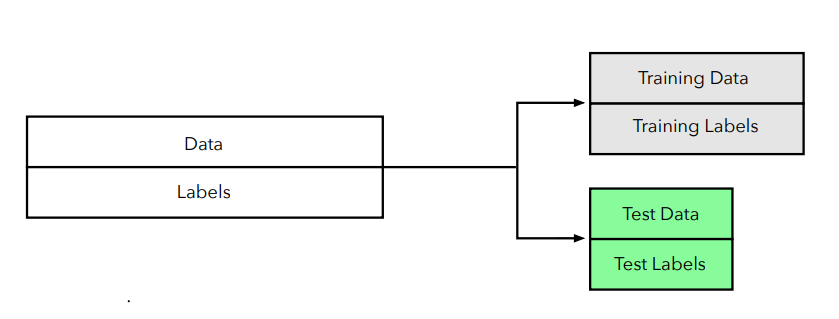

Как бить?

1. **Случайное разбиение** - можно, мы уже делали.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

Может НЕ отражать того, что мы ожидаем в реальности. Часто получаем завышенную оценку качества

2. **Стратифициованная выборка**

Бьем так, чтобы соотношение значений целевой переменной (y) была одинаковым в train и test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_selected, patients['State'], test_size=0.3,
                                                    stratify=patients['State'], random_state=43)

Может НЕ отражать того, что мы ожидаем в реальности. Часто получаем завышенную оценку качества

В обоих предыдущих случаях мы не избегаем **data leakage** - ситуации, когда модель учится предсказывать не зависимость, которую мы хотим, а находит способ хитрить, обходясь запоминанием учебной выборки

**3. Разбиение, опирающееся на знания о домене, в котором вы работаете**

Для каждого домена - свои особенности. Рассмотрим позже

### Почему нельзя сделать трейн-тест сплит и подбирать гиперпараметры на тесте?

В таком сценарии происходит переобучение на тестовый датасет, и он по сути превращается в тренировочный для гиперпараметров.

Покажем это

Представим себе, что у нас есть 10000 моделей, полученных подкручиванием разных гиперпараметров. Представим, что все эти модели не работают, т.е. представляют из себя случайное угадывание.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import warnings


warnings.filterwarnings('ignore')

# случайные модельки просто угадывают случайные данные
def guess_model(y_real, seed=777):
    np.random.seed(seed)
    guessed = np.random.choice([True, False],
                               size=y_real.shape[0],
                               replace=True)
    y_predicted = np.zeros_like(y_real)
    y_predicted[guessed] = y_real[guessed]
    y_predicted[~guessed] = 1 - y_real[~guessed]
    return y_predicted

In [ ]:
np.random.seed(777)
y_real = np.random.choice([0,1], size=250, replace=True)

In [ ]:
import tqdm

In [ ]:
models_num = 10000
best_quality = 0.5

seeds = np.arange(0, models_num)

best_seed = -1
for i in tqdm.tqdm(range(models_num)):
    y_pred = guess_model(y_real, seed=seeds[i])
    q = accuracy_score(y_pred=y_pred, y_true=y_real)
    if q > best_quality:
        best_quality = q
        best_seed = seeds[i]

100%|██████████| 10000/10000 [00:07<00:00, 1356.21it/s]


In [ ]:
print(best_quality, best_seed)

0.624 5554


Допустили утечку информации из test в наши гиперпараметры.

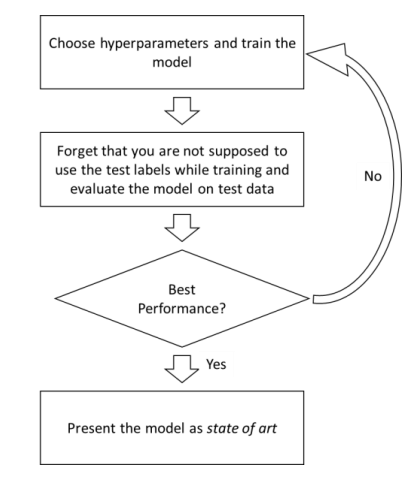

Крутая статья про эту и многие другие ошибки - [Ten ways to fool the masses with machine learning](https://arxiv.org/abs/1901.01686)

Путём подкручивания гиперпараметров на тесте можно получить какой-то мнимый результат, когда модель не рабочая.

#### Следствие 1

Если много людей мучают один и тот же датасет - то что-нибудь получится

> При достаточном долгом переборе среди похожих сущностей, можно найти сущность с нужном качеством на тестовом датасете, при этом являющую собой исключительно нерабочую вещь

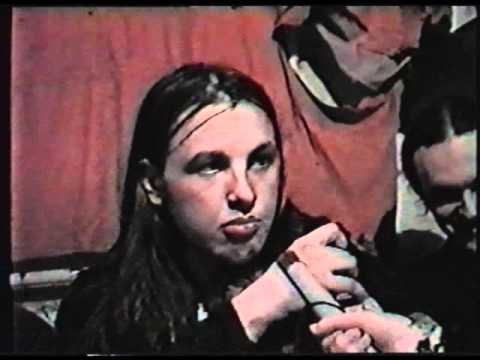

**Решение** - проведение конкурсов на принципиально новых данных. Например, [CASP](https://predictioncenter.org/)

## Holdout Validation (проверка на отложенной выборке)

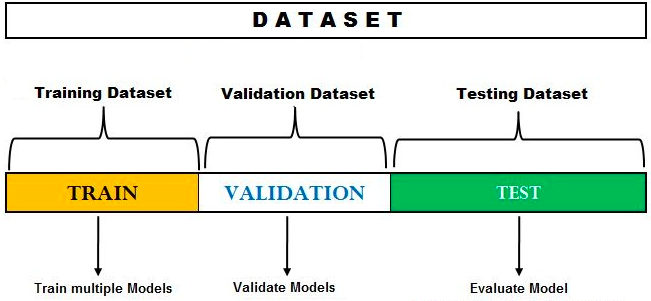

Просто разбиваем не на 2, а на 3 датасета

Предобработаем данные

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
del breast_cancer

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100,
                                                    stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=203,
                                                  stratify=y_train_full)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Переберем много гиперпараметров

In [ ]:
knn_train_auroc = []
knn_val_auroc = []
sc_train_auroc = []
sc_val_auroc = []

neighbors = np.arange(1, 51, 1)
for knei in neighbors:
    knn = KNeighborsClassifier(n_neighbors=knei)
    knn.fit(X_train, y_train)
    tr_au = roc_auc_score(y_train, y_score=knn.predict_proba(X_train)[:, 1])
    knn_train_auroc.append(tr_au)
    val_au = roc_auc_score(y_val, y_score=knn.predict_proba(X_val)[:, 1])
    knn_val_auroc.append(val_au)

regularization = np.arange(0.001, 10, 0.5)
for C in regularization:
    sc = SVC(random_state=1, C=C, probability=True)
    sc.fit(X_train, y_train)
    tr_au = roc_auc_score(y_train, y_score=sc.predict_proba(X_train)[:, 1])
    sc_train_auroc.append(tr_au)
    val_au = roc_auc_score(y_val, y_score=sc.predict_proba(X_val)[:, 1])
    sc_val_auroc.append(val_au)

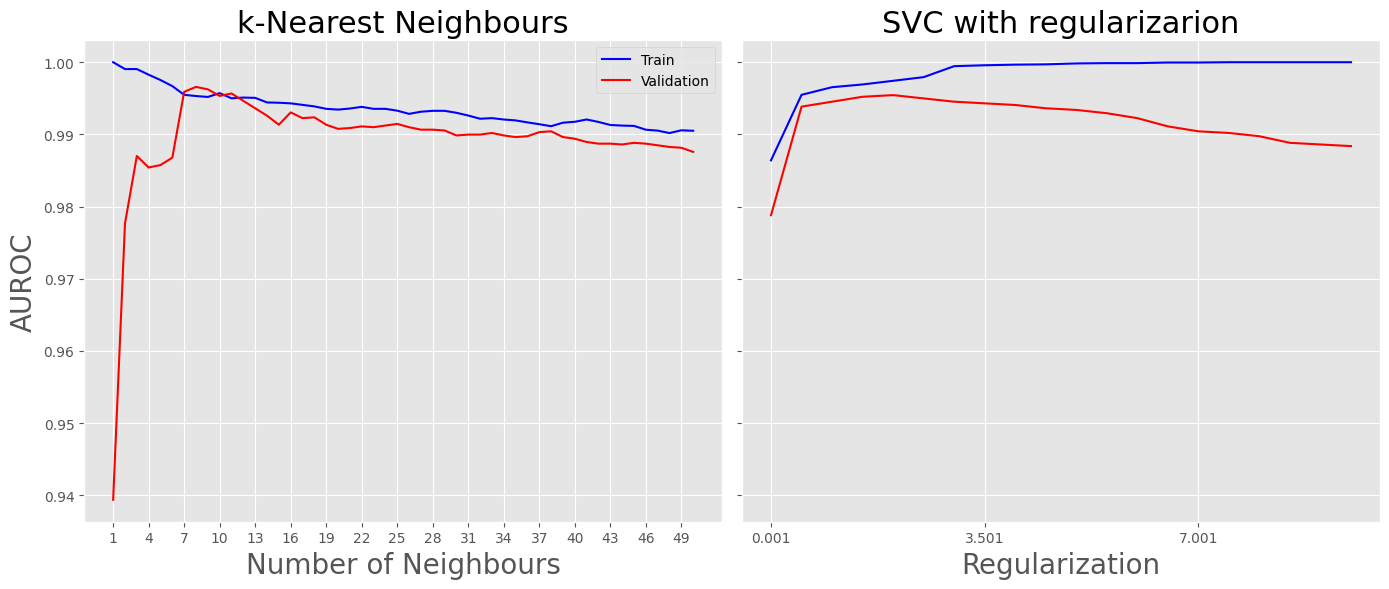

In [ ]:
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    ax1.set_title('k-Nearest Neighbours', size=22)
    ax1.set_ylabel("AUROC", size=20)
    ax1.set_xlabel("Number of Neighbours", size=20)
    ax1.set_xticks(neighbors[::3])
    ax1.plot(neighbors, knn_train_auroc, c="b", label="Train")
    ax1.plot(neighbors, knn_val_auroc, c="r", label="Validation")
    ax1.legend()
    ax2.set_title('SVC with regularizarion', size=22)
    ax2.set_xlabel('Regularization', size=20)
    ax2.set_xticks(regularization[::7])
    ax2.plot(regularization, sc_train_auroc, c='b', label='Train')
    ax2.plot(regularization, sc_val_auroc, c='r', label='Validation')
    fig.tight_layout()

In [ ]:
max(knn_val_auroc), max(sc_val_auroc)

(0.9965800273597811, 0.9954400364797081)

KNN выиграл

In [ ]:
neighbors[np.argmax(knn_val_auroc)]

8

Выбрали оптимальные гиперпараметры, а теперь уже проводим итоговую оценку на тестовой датасете

In [ ]:
# Final evaluation

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_score=knn.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_score)

0.9899140211640212

### Плюсы

* Ура, получили какую-то оценку. Для больших датасетов хватает и этого подхода для получения оценки алгоритма

### Минусы

* Точечная оценка, причём чем меньше примеров в валидационном наборе, тем выше
дисперсия. Чем больше примеров - тем меньше примеров остается для обучения модели
* Снижение размера данных, которые попадают в модель при обучении.

## Monte-Carlo cross-validation

Повторение процедуры holdout несколько раз. Есть варианты, когда на каждой итерации варьируется размер валидационной выборки.

## поправить test на валидацию

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/montecarlo_val.png" width="500">

Можно использовать <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html'>ShuffleSplit</a> и <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html'>StratifiedShuffleSplit</a> из sklearn.model_selection, можно наколхозить.<br>
Если нарушается i.i.d., то существует <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html'>GroupShuffleSplit</a>.

<b>Учтите!</b><br>
Здесь и дальше манипуляции с признаками (шкалирование и пр.) надо производить внутри цикла. Нормализация (и другие сходные операции) по всему датасету приведёт к переобучению (вы показываете модели больший кусок распределения, чем есть в обучающей выборке).

In [ ]:
def get_monte_carlo_cv_scores(X, y, clf, n_samples,
                              test_size='random', random_state=12345):
    rng = np.random.RandomState(seed=random_state)
    seeds = np.arange(10**5)
    rng.shuffle(seeds)
    seeds = seeds[:n_samples]
    auroc_mccv = []
    if test_size == 'random':
        sizes = rng.choice(np.linspace(0.05, 0.5, 46),
                           size=n_samples, replace=True)
        for i, size in zip(seeds, sizes):
            X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                              test_size=size,
                                                              random_state=i,
                                                              stratify=y)
            scaler = StandardScaler().fit(X_train)
            X_train = scaler.transform(X_train)
            X_val = scaler.transform(X_val)
            y_score = clf.fit(X_train, y_train).predict_proba(X_val)[:, 1]
            auroc = roc_auc_score(y_true=y_val, y_score=y_score)
            auroc_mccv.append(auroc)
    elif isinstance(test_size, float):
        for i in seeds:
            X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                              test_size=test_size,
                                                              random_state=i,
                                                              stratify=y)
            scaler = StandardScaler().fit(X_train)
            X_train = scaler.transform(X_train)
            X_val = scaler.transform(X_val)
            y_score = clf.fit(X_train, y_train).predict_proba(X_val)[:, 1]
            auroc = roc_auc_score(y_true=y_val, y_score=y_score)
            auroc_mccv.append(auroc)
    else:
        return 'Wrong test_size type. Must be string ("random") or float'
    return np.array(auroc_mccv)

In [ ]:
def plot_mccv_results(auroc, title):
    with plt.style.context(('ggplot')):
        plt.figure(figsize=(12, 6))
        plt.title(title, size=22)
        plt.bar(range(0, auroc.shape[0]), auroc, color='gray', alpha=0.7)
        plt.axhline(auroc.max(), color='k', linewidth=1, linestyle='--')
        plt.axhline(auroc.min(), color='k', linewidth=1, linestyle='--')
        plt.axhspan(auroc.min(), auroc.max(), alpha=0.2, color='steelblue')
        plt.ylim([0, auroc.max() + 0.1])
        plt.xlabel('Repetition')
        plt.ylabel('AUROC')
        plt.ylim([0.5, 1.0])
        plt.tight_layout()
        plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100,
                                                    stratify=y)

clf = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)

auroc_mccv_50 = get_monte_carlo_cv_scores(X_train, y_train, clf, 100, .5)
auroc_mccv_10 = get_monte_carlo_cv_scores(X_train, y_train, clf, 100, .1)
auroc_mccv_random = get_monte_carlo_cv_scores(X_train, y_train, clf, 100)

In [ ]:
auroc_mccv_50.mean(), auroc_mccv_10.mean(), auroc_mccv_random.mean()

(0.969702591526121, 0.973367139959432, 0.9717028934358618)

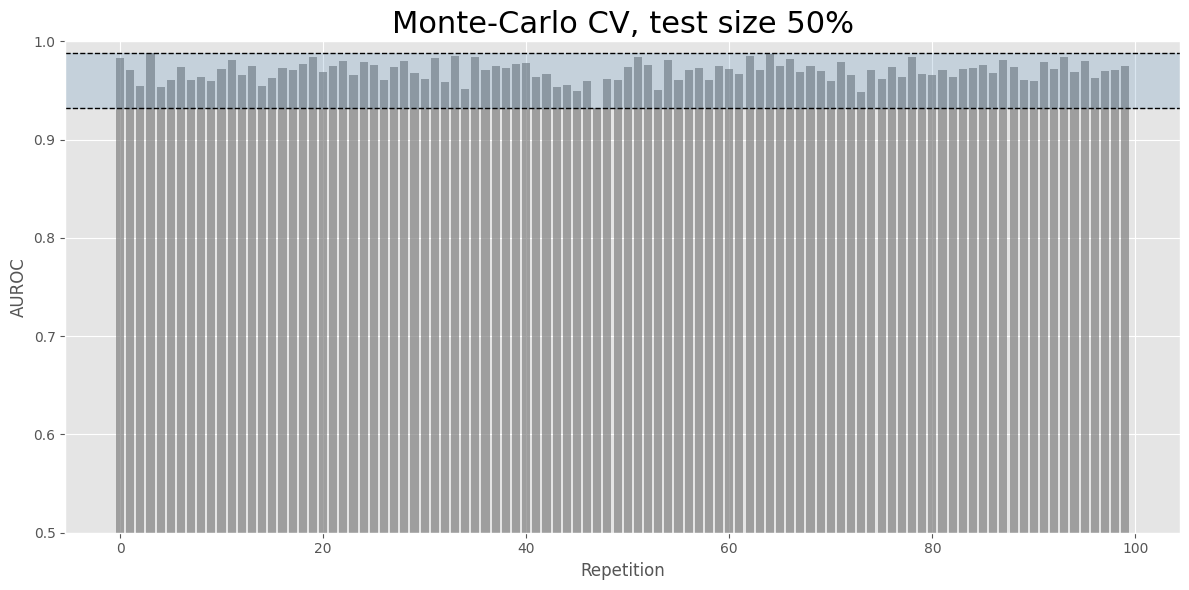

In [ ]:
plot_mccv_results(auroc_mccv_50, 'Monte-Carlo CV, test size 50%')

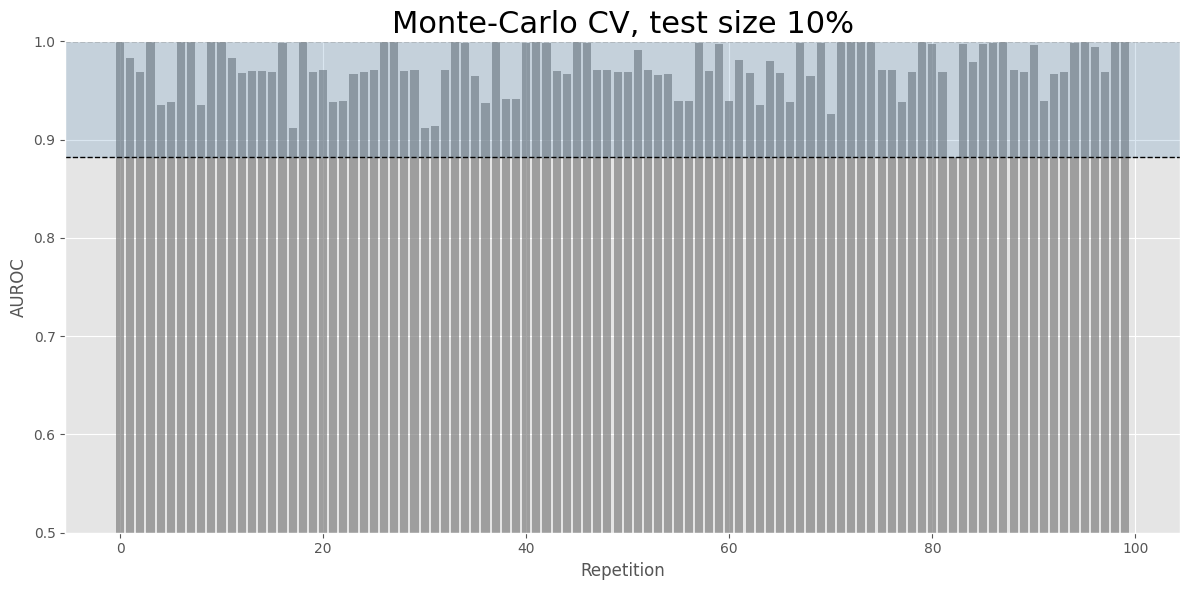

In [ ]:
plot_mccv_results(auroc_mccv_10, 'Monte-Carlo CV, test size 10%')

### Плюсы

* Получаем массив оценок, можно оценить дисперсию оценки, строить интервалы, применять статтесты и пр.;
* Более гибкая схема валидации, можно придумать свои модификации этого метода (например, зашумлять объекты - аугментация данных).

### Минусы

* Нет гарантии, что каждый объект попадёт в обучение;
* Надо обучать алгоритм много раз, может быть трудоёмко по времени.

## K-Fold cross-validation

В общем виде выглядит вот так:

![cv-scheme](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

Крайние примеры - leave-one-out (LOO, n разбиений, в тестовую выборку попадает по одному объекту) и 2-fold (два разбиения 50/50).


В sklearn.model_selection реализованы многие модификации метода:

* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html'>KFold</a> - классическая схема;
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html'>StratifiedKFold</a> - k разбиений со стратификацией по меткам классов;
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html'>GroupKFold</a> - k блоков с учётом групп для задач с нарушением i.i.d. (наличием multiple sources);
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html'>LeaveOneOut</a> - классический LOO;
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeavePOut.html'>LeavePOut</a> - в тест попадают все возможные наборы из p объектов (всего $C_n^p$)
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html'>LeaveOneGroupOut</a> - LOO для multiple sources;
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeavePGroupsOut.html'>LeavePGroupsOut</a> - LPO для mutiple sources.
* некоторые другие.

In [ ]:
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=100, stratify=y)

clf = LogisticRegression(random_state=1)
skf_scores = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in cv.split(X_train, y_train):
    X_train_, y_train_ = X_train[train_index], y_train[train_index]
    X_val, y_val = X_train[test_index], y_train[test_index]
    scaler = StandardScaler().fit(X_train_)
    X_train_ = scaler.transform(X_train_)
    X_val = scaler.transform(X_val)
    clf.fit(X_train_, y_train_)
    pred = clf.predict_proba(X_val)[:, 1]
    skf_scores.append(roc_auc_score(y_val, pred))
skf_scores = np.array(skf_scores)

In [ ]:
skf_scores.mean(), skf_scores.std()

(0.9921568627450981, 0.00735108516759884)

### Плюсы
* Гарантия попадания каждого объекта и в трейн, и в тест;
* Получаем массив оценок;
* Гибкость.

### Минусы

* Непонятно, сколько блоков брать (чаще всего - 5 или 10, но очень зависит от данных и задачи);
* Опять надо обучаться много раз (в случае LPO - очень много), может быть трудоёмко по времени;
* В случае LOO - высокая дисперсия оценки, невозможность подсчитать некоторые метрики (тот же AUROC). Часть метрик для большого числа объектов можно высчитать аналитически - валидация фактически не работает

## Кросс-валидация для временных рядов


![alttext](https://miro.medium.com/max/1204/1*qvdnPF8ETV9mFdMT0Y_BBA.png)

![alttext](https://miro.medium.com/max/1210/1*QJaeOqGfe_vKbpmT882APA.png)

# Особенности валидации с биологическими данными

### Train-test split

На прошлых занятиях мы использовали следующую схему разбиения

<img src="https://conlanscientific.com/media/content/splitting-data.png" width="500">

Оно предполагает, что мы наши данные **независимы**. Нет копий каких-то объектов, нет зашумленных версий каких-то объектов  и т.д.

Если это не выполняется - то наша оценка качества модели сильно проседает.

Для биологических данных постоянно нарушается предположение о том, что объекты в выборке, которую мы получили - независимы.





## Медицинские изображения

Проблема с правильной кросс-валидацией [указывается](https://www.technologyreview.com/2021/07/30/1030329/machine-learning-ai-failed-covid-hospital-diagnosis-pandemic/), в числе прочих, и среди причин невозможности применения кучи опубликованных моделей для реальной диагностики ковида.

Более того, много статей, к примеру - [из недавних](https://www.nature.com/articles/s42256-021-00307-0) - посвящено тому, как правильно делать исследование на медицинских изображениях. И там упоминается и проблема кроссвалидации.



В снимках могут быть фотографии, полученные от одного пациента. Могут быть снимки с одного прибора, окрашенные одним и тем же специфичным способом и т.д.

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/cross_patient.png" width="500">



## Нуклеотидные последовательности и Biasaway

Очень часто последовательности, содержащие сигнал и без сигнала отличаются по GC-контенту - относительному содержанию нуклеотидов G и C в последовательности.

Особенно этому подвержены ситуации, когда последовательностями без сигнала мы считаем случайным образом взятые последовательности из генома.

Большая часть моделей может легко вывести из поданных им на вход признаков GC-контент и классифицировать выборки на его основании.



In [ ]:
!gdown https://drive.google.com/uc\?id=1TOpoivIwMHEvWm-MSszd2UaYn42-CJt2 -O negative.fasta.gz
!gdown https://drive.google.com/uc\?id=14ts2nq0U1v2cP73npKJQzsG1OHjE_OhS -O positive.fasta.gz

Downloading...
From: https://drive.google.com/uc?id=1TOpoivIwMHEvWm-MSszd2UaYn42-CJt2
To: /content/negative.fasta.gz
100% 10.6M/10.6M [00:00<00:00, 51.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14ts2nq0U1v2cP73npKJQzsG1OHjE_OhS
From (redirected): https://drive.google.com/uc?id=14ts2nq0U1v2cP73npKJQzsG1OHjE_OhS&confirm=t&uuid=a21218cd-bb11-4af4-9d76-ceb777a78863
To: /content/positive.fasta.gz
100% 28.6M/28.6M [00:00<00:00, 48.7MB/s]


In [ ]:
!pip install pyfastx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.9 MB/s eta 0:00:00


In [ ]:
import pyfastx

In [ ]:
fa = pyfastx.Fasta('positive.fasta.gz')
gc_array_pos = []
ind = 0
for seq in fa:
    ind += 1
    gc_array_pos.append(seq.gc_content)
    if ind == 10000:
        break

In [ ]:
fa = pyfastx.Fasta('negative.fasta.gz')
gc_array_neg = []
ind = 0
for seq in fa:
    gc_array_neg.append(seq.gc_content)
    ind += 1
    if ind == 10000:
        break

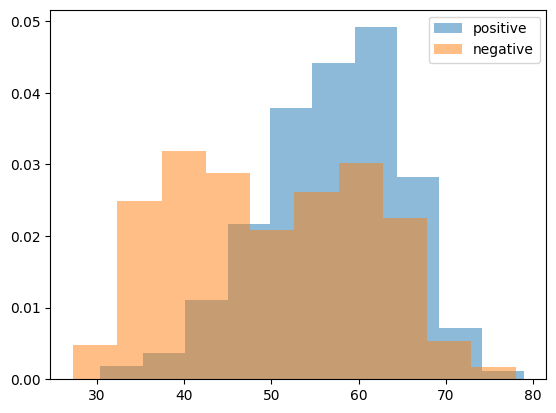

In [ ]:
from matplotlib import pyplot as plt

plt.hist(gc_array_pos, label="positive", density=True, alpha=0.5)
plt.hist(gc_array_neg, label="negative", density=True, alpha=0.5)
plt.legend()
plt.show()

Для борьбы с этим (и похожими проблемами) существует программа [BiasAway](https://biasaway.uio.no/), которая пытается выбрать последовательности из негативной выборки таким образом, чтобы содержание GC между позитивным и негативным классом не отличалось

## Cross-chromosome и cross-cell validation



Когда мы делаем предсказания на геномных данных, необходимо быть ОЧЕНЬ внимательным.

Многие сигналы, такие как доступность хроматина, опасность мутаций в позиции и т.д обладают выраженной локальностью - по рядом стоящей позиции можно с большой достоверностью предсказать значение в текущей позиции.

Некоторые сигналы более-менее сохраняют свое значение на больших участках генома, а модели машинного обучения склонны легко запоминать конкретные последовательности и "составлять" внутри себя карту генома.


Представим себе ситуацию, что у нас есть данные двух клеточных линий для всех хромосом

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/genome_cross0.png" width="600">

Как мы можем разбить наши данные на обучение и тест?

### Случайное разбиение

Не рекомендуется - модель почти наверняка переобучится

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/genome_cross1.png" width="600">

### Разбиение по клеточным линиям

Лучше, но надо сравниваться с предсказанием среднего по линиям, на которых училась модель

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/genome_cross2.png" width="600">

### Разбиение по хромосомам

Хороший вариант, ловит почти все проблемы

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/genome_cross3.png" width="600">

### Разбиение по длинным участкам

Можно в обучение брать одни протяженные участки, а в тест - другие.
Проблема - можно обмануться с необходимым размером.

Достаточно безопасно брать половинки хромосом

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/genome_cross4.png" width="600">

### TargetFinder

Представим себе следующую задачу:
1) дана последовательность энхансера
2) дана последовательность промотора
3) предсказать, будут ли они взаимодействовать

Автор TargetFinder в данной задаче смогли добиться точности порядка 99% процентов. Кажется подозрительным.

И в скором времени вышла статья, где было показано, что все качество авторов происходит из-за неправильного разбиения данных.
В выборку попадали последовательности из одной и той же хромосомы, более того, один и тот же промотор/энхансер могли быть как в обучении, так и в тесте.

Признаки, которые они предложили, позволяли модели легко запоминать конкретные промоторы и энхансеры, понимать, что лежит в окружении того или иного регуляторного участка.

Как было показано, что в модели есть проблемы - просто предложили два разбиения - кросс-хромосомное, когда в тест попадали пары промотор-энхансер только с одних хромосом, а в трейн - с других.

И второе - где хотя бы гарантировалось, что один и тот же промотор будет либо только в тесте, либо только в обучении.

Второе разбиение было более мягким - на нем модель все равно находила "как переобучиться". На кросс-хромосомном уровне data leakage убирался полностью.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/crosschromosome.png" width="700">


### A pitfall for machine learning methods aiming to predict across cell types

Аналогичный эффект был [продемонстрирован](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02177-y) при попытке обучить модель, предсказывающую, какие гены будут значимо экспрессироваться в клеточной линии. "Лучшим" предсказанием сигнала для определенной клеточной линии оказывается просто предсказание для данного гена среднего по остальным клеточным линиям.

Модель же "стремится" к идеалу - чем больше ей дается параметров, тем лучше она запоминает и тем больше ее предсказание становится похоже на среднее

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/expression.png" width="700">

### Avocado

В [статье](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-01977-6) используют неправильные разбиения, что были еще в TargetFinder

![alttext](https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs13059-020-01977-6/MediaObjects/13059_2020_1977_Fig5_HTML.png?as=webp)

### CAGI2018

Авторы конкурса недооценили размер блоков, на которые надо резать геномные данные (**A**) и в итоге модель учила не признаки, важные для предсказания эффекта мутации, а призниак, важные для предсказания, какой объект из обучающей выборки был ближе **по геному**.

Соответственно, при правильных разбиениях большая часть моделей [показывали](https://www.frontiersin.org/articles/10.3389/fgene.2019.01078/full) куда меньшее качество и были не переносимы на реальные данные, где все последовательности относятся к тем, которые модели не видели

<img src="https://www.frontiersin.org/files/Articles/485085/fgene-10-01078-HTML/image_m/fgene-10-01078-g001.jpg" width="600">

В результате, даже модель, обученная на абсолютно случайных признаках, показывала качество лучше многих конкурсных решений

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/cagi2018_fakesig.png" width="500">

## Разбиение химических веществ

### Разные разбиения - разные результаты

Аналогичная проблема может возникнуть и при разбиении химических веществ.

Допустим, что вы хотите предсказывать связывание белка с веществом

В [статье](https://arxiv.org/abs/1703.10603) приводят пример, что в зависимости от того, как разбить комплексы белков с веществами на обучение и тест, оценка качества может меняться очень разными путями.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/chemsplit.png" width="700">

### Датасеты могут быть разные по качеству

Бывают хорошие датасеты, где для каждого белка известны как ингибиторы, так и вещества ими неявляющимися. И для каждого вещества известны и белки, с которыми оно связывается, и с которыми нет.
В этом случае может повезти - и любое разбиение будет давать вам хорошее качество

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/chembase1.png" width="700">





Бывают же датасеты, где для каких-то веществ изввестны только белки, которые они ингибируют (ученые любят сообщать об успехах, а не о неудачах) или белки, для которых известны только ингибиторы (или ингибиторов неизвестно).

В этом случае без правильного разбиения - хорошо оценить качество модели не получится.

### Разбиение по веществу

Информация про одно и то же вещество идет либо только в обучение, либо только в тест.

### Разбиение по scaffold

Разбиение по структуре вещества. Например, на основании [Bemis-Murcko scaffold](https://docs.chemaxon.com/display/docs/bemis-murcko-clustering.md)


<img src="https://kodomo.fbb.msu.ru/FBB/year_21/bemismurko_scaf.jpeg" width="500">

### Разбиение по белку

Комплексы одного и того же белка идут либо только в обучении, либо в тест.

### Разбиение по семействам

Есть разные разбиения белков на классы по похожести.

Можем брать белки из одного класса либо только в обучение, либо только в тест. Или можно напрямую контролировать, чтобы похожесть между последовательностями в обучении и тесте не была больше заданного порога



![alttext](https://d3i71xaburhd42.cloudfront.net/67fdfd931031a2cce96e5f1d06369e06ce9e6bae/8-Figure3-1.png)

## Медицинские записи

В медицинских записях так же [могут](https://www.sciencedirect.com/science/article/pii/S153204641830073X) встречаться полные дупликаты или почти-дупликаты. Если не очистить датасет от них предварительно или не обеспечить праавильного разбиения - получится неправильная оценка качества модели

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S153204641830073X-fx1_lrg.jpg" width="600">

## RNA-Seq

Бывает и [такое](https://www.biorxiv.org/content/10.1101/2020.09.09.290395v1.full)

>The testing data was held by a separate analysis group
using a different computer system to avoid any possibility
of inadvertent use of test data in the model building
process.



Но вообще проблема серьезная.

In [ ]:
import gdown

# Option 2: Use the shareable link directly
url = 'https://drive.google.com/uc?id=1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl'
gdown.download(url, 'gse53625_expression.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl
From (redirected): https://drive.google.com/uc?id=1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl&confirm=t&uuid=32b10e23-d45b-4de8-bec7-2def87a75957
To: /content/gse53625_expression.csv
100%|██████████| 246M/246M [00:01<00:00, 185MB/s]


'gse53625_expression.csv'

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N' -O gse53625_metadata.csv

--2024-11-09 10:30:40--  https://docs.google.com/uc?export=download&id=1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N
Resolving docs.google.com (docs.google.com)... 172.253.62.100, 172.253.62.101, 172.253.62.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.62.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N&export=download [following]
--2024-11-09 10:30:40--  https://drive.usercontent.google.com/download?id=1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.122.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11769 (11K) [application/octet-stream]
Saving to: ‘gse53625_metadata.csv’

gse53625_metadata.c 100%[===================>]  11.49K  --.-KB/

In [ ]:
import pandas as pd

escc = pd.read_csv("./gse53625_expression.csv", index_col=0)
escc_meta = pd.read_csv("./gse53625_metadata.csv", index_col=0)

In [ ]:
escc.head()

,GSM1296956,GSM1296957,GSM1296958,GSM1296959,GSM1296960,GSM1296961,GSM1296962,GSM1296963,GSM1296964,GSM1296965,...,GSM1297304,GSM1297305,GSM1297306,GSM1297307,GSM1297308,GSM1297309,GSM1297310,GSM1297311,GSM1297312,GSM1297313
gene,,,,,,,,,,,,,,,,,,,,,
1,13.374975,13.555346,13.396705,13.843843,13.505687,13.865681,13.558679,13.821428,13.325379,13.911579,...,14.755057,14.523150,13.366847,13.773212,14.800437,15.256065,14.967925,15.166759,15.198897,15.800609
2,3.536581,4.772572,4.804828,4.563550,4.750858,5.110868,4.286497,3.910839,5.489828,5.957020,...,2.989318,3.274197,4.136096,3.846309,3.191611,3.658061,3.222255,3.170619,2.881199,2.788223
24,13.644486,14.153843,13.948490,14.390648,14.049400,14.407393,14.039293,14.165211,13.782069,13.930771,...,15.109227,15.599209,15.466478,15.858328,15.153250,15.570171,15.230037,15.528894,15.230680,15.524473
25,3.929925,4.388201,4.395992,4.697154,4.476174,4.456455,4.075643,4.193375,4.851017,5.018208,...,3.303802,3.349361,3.605046,3.546976,3.294372,3.675983,3.252973,3.288352,3.123193,4.139961
26,5.485977,5.412374,5.627752,5.511075,5.753380,5.964689,5.824498,5.501963,5.525633,5.746703,...,6.983026,6.060983,5.600604,5.317658,5.913674,4.775737,5.800031,6.643709,5.977257,7.855444


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def draw_pca_chart(df: pd.DataFrame, y_column=None, normalize=True, vis_type="PCA", seed=42):
    assert vis_type.lower() in ["pca", "tsne", "umap"], "Incorrect visualization type/ Allowed: 'pca', 'tsne', 'umap'"

    df = df.copy()
    if y_column is None:
        y = pd.Series(index=df.index, data=0, name=None)
    elif isinstance(y_column, str):
        assert y_column in df.columns, f"{y_column} is not in DataFrame"
        y = df.pop(y_column)
    elif isinstance(y_column, pd.Series):
        y = y_column
    df = df.select_dtypes(include=np.number)
    X = df.values

    if normalize:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    if vis_type.lower() == "pca":
        pca = PCA(n_components=2) # no kernel pca
        X_transf = pca.fit_transform(X)
    elif vis_type.lower() == "tsne":
        tsne = TSNE(n_components=2, random_state=seed) # no distance
        X_transf = tsne.fit_transform(X)
    elif vis_type.lower() == "umap":
        um = umap.UMAP(n_components=2, random_state=seed) # no distance
        X_transf = um.fit_transform(X)

    df = pd.DataFrame({"Component 1": X_transf[:,0],
                       "Component 2": X_transf[:,1],
                       y.name: y})
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="Component 1", y="Component 2", hue=y.name, data=df, alpha=0.75)
    plt.title(f"{vis_type} analysis", fontsize=16)

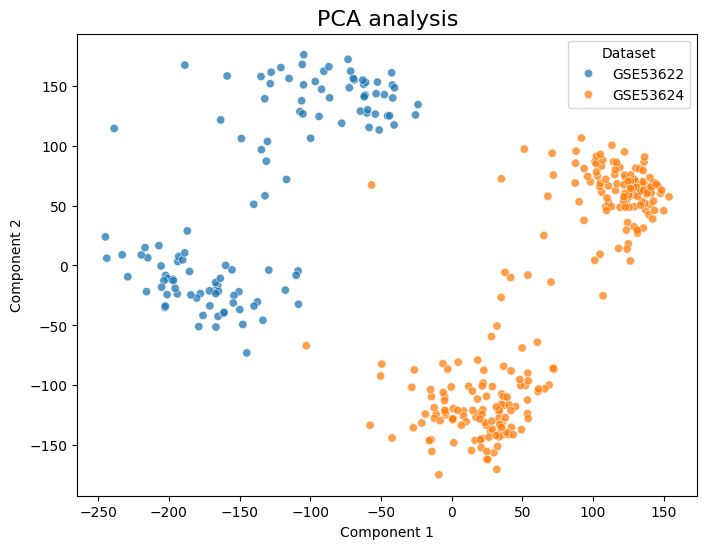

In [ ]:
draw_pca_chart(escc.T, escc_meta["Dataset"], normalize=False)

Решить эту можно по-разному. Но она не всегда решается и не всегда **можно заметить**, что она не решилась.

Потому правила те же - бить данные по пациентам/больницам и тд.

## Гомологичные последовательности

При работе с белковыми последовательностями также стоит учитывать то, что они могут образовывать кластеры очень похожих друг на друга последовательностей.
Обычно, чем меньше похожесть последовательностей из трейна и теста друг на друга, тем сложнее оказывается задача.

Например, в [задаче предказания GO-аннотации](https://www.nature.com/articles/s41598-020-80786-0) качество модели падает (местами дяо качеста классических методов), по мере увеличения похожести между обучением и тестом

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/go_pred.png" width="700">



## Общая рекомендация

Всегда думайте, что в Вашей задаче является источником распределения, генерирующего данные. Отсюда вытекают cross-chromosome, cross-cell line, cross-patient и прочие валидации...